## Import Libraries

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# Ignore FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read csv files

In [152]:
from google.colab import files

uploaded = files.upload()

d = pd.read_csv('train.csv', encoding='latin1')
f = pd.read_csv('test.csv', encoding='latin1')

df = pd.concat([d, f])


Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [153]:
data_s=df

## Explore dataset

In [154]:


df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Name,Tweet
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,NaN,NaN
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,NaN,NaN
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,NaN,NaN
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,NaN,NaN
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,NaN,NaN


In [155]:
df['text'].isnull().value_counts()

text
False    27480
True      3535
Name: count, dtype: int64

In [156]:
df.isnull().sum()

textID               3534
text                 3535
selected_text        3535
sentiment               0
Time of Tweet           0
Age of User             0
Country                 0
Population -2020        0
Land Area (Km²)         0
Density (P/Km²)         0
Name                27481
Tweet               27481
dtype: int64

## Drop unuseful data

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31015 entries, 0 to 3533
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  int64  
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  int64  
 10  Name              3534 non-null   object 
 11  Tweet             3534 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.1+ MB


In [158]:
df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)','Name','Tweet'],inplace=True)

In [159]:
##Dropping null value rows

In [160]:

df.dropna(subset=['text'], inplace=True)


In [161]:
df

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,But it was worth it ****.,But it was worth it ****.,positive


## Convert Data

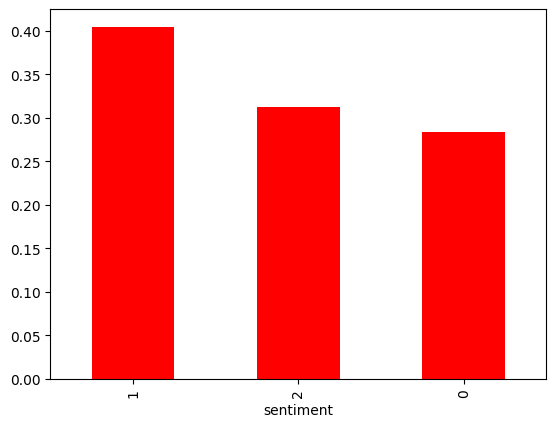

In [162]:

df['sentiment'] = df['sentiment'].astype('category').cat.codes
df['sentiment'].value_counts(normalize=True).plot(kind='bar',color='red');

In [163]:
df.tail()

,text,selected_text,sentiment
27476,wish we could come see u on Denver husband l...,d lost,0
27477,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,But it was worth it ****.,But it was worth it ****.,2
27480,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,1


In [164]:
df['sentiment'].value_counts()

sentiment
1    11117
2     8582
0     7781
Name: count, dtype: int64

## Creat a function to process text

In [165]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [166]:
df['selected_text'] = df["selected_text"].apply(wp)

In [167]:
df

,text,selected_text,sentiment
0,"I`d have responded, if I were going",i d have responded if i were going,1
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",sons of,0
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,0
27477,I`ve wondered about rake to. The client has ...,don t force,0
27478,Yay good for both of you. Enjoy the break - y...,yay good for both of you,2
27479,But it was worth it ****.,but it was worth it,2


## Split data

In [168]:
X=df['selected_text']
y= df['sentiment']

In [169]:
feature_listt=['sentiment']


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21984,)
(5496,)
(21984,)
(5496,)


## Convert text to vectors

In [171]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

## Decision Tree Classification

In [172]:
from sklearn.tree import plot_tree

In [173]:
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)

DecisionTreeClassifier()

In [174]:
dt.classes_

array([0, 1, 2], dtype=int8)

In [175]:
# Convert class labels to string
class_names = [str(label) for label in dt.classes_]

In [176]:
pred_dt = dt.predict(XV_test)

In [177]:
score_dt = dt.score(XV_test, y_test)*100
print(f"The Accuracy of Decision Tree is {score_dt}%")

The Accuracy of Decision Tree is 76.32823871906841%


In [178]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1572
           1       0.76      0.77      0.77      2236
           2       0.82      0.76      0.79      1688

    accuracy                           0.76      5496
   macro avg       0.76      0.76      0.76      5496
weighted avg       0.77      0.76      0.76      5496



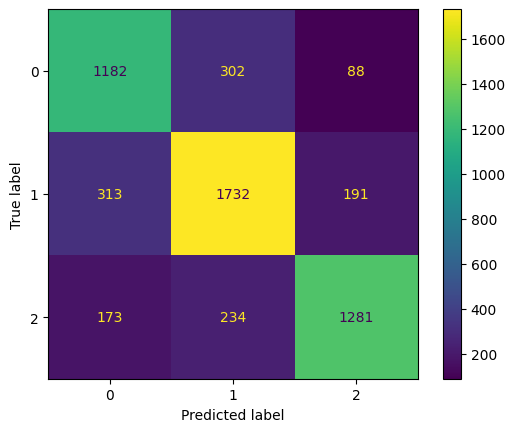

In [179]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);

# Hyper Parameter Tunning using Grid Search

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree model
dtt = DecisionTreeClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(dtt, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(XV_train, y_train)

# Print the best parameters and accuracy
print(f"Best parameters for Decision Tree: {grid_search.best_params_}")
print(f"Best accuracy for Decision Tree: {grid_search.best_score_}")


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy for Decision Tree: 0.7618266797425575


In [182]:
##Accuracy Best parameters = 76.18266797425575%

In [183]:
dt_best=DecisionTreeClassifier(min_samples_leaf= 1, min_samples_split= 2)

In [184]:
dt_best.fit(XV_train, y_train)

DecisionTreeClassifier()

In [185]:
# Convert class labels to strings
class_names = [str(label) for label in y_train]

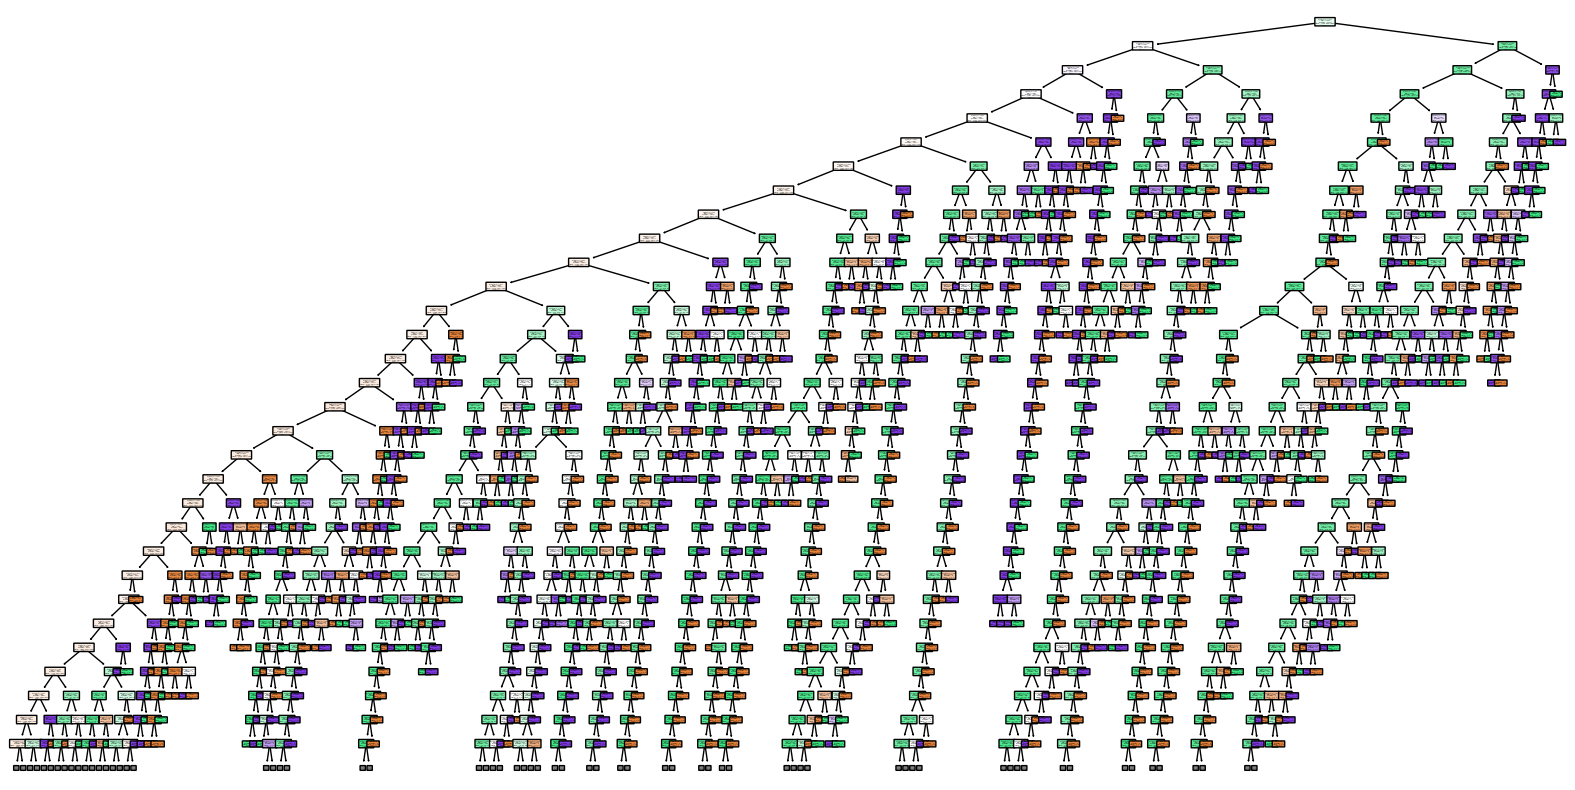

In [186]:
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(dt_best,max_depth=30, class_names=class_names, filled=True, rounded=True)
plt.show()